In [ ]:
#Find what is the avearge of all engineering students in the language paper in all over india

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
import pandas as pd
from sklearn import model_selection
from sklearn import metrics

In [10]:
marks=np.random.randint(0,100,size=10000)

In [15]:
actualavg=marks.mean()
actualavg

49.2761

(array([506., 488., 492., 517., 516., 477., 513., 498., 515., 526., 528.,
        467., 486., 520., 504., 478., 490., 518., 464., 497.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

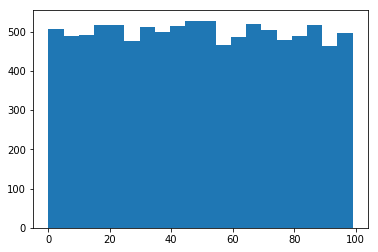

In [33]:
#Sample size should not be below 30
N=100
B=20000
mastersample=np.random.choice(marks,size=N,replace=True)
mastersample.mean()
plt.hist(marks,bins=20)

(array([5.000e+00, 1.900e+01, 6.200e+01, 1.640e+02, 4.110e+02, 8.510e+02,
        1.526e+03, 2.207e+03, 2.811e+03, 3.216e+03, 2.924e+03, 2.355e+03,
        1.642e+03, 1.008e+03, 4.630e+02, 2.160e+02, 8.100e+01, 3.100e+01,
        5.000e+00, 3.000e+00]),
 array([32.75  , 33.8725, 34.995 , 36.1175, 37.24  , 38.3625, 39.485 ,
        40.6075, 41.73  , 42.8525, 43.975 , 45.0975, 46.22  , 47.3425,
        48.465 , 49.5875, 50.71  , 51.8325, 52.955 , 54.0775, 55.2   ]),
 <a list of 20 Patch objects>)

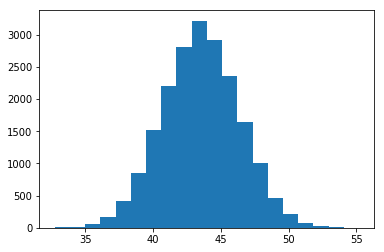

In [34]:
#bootstraping == sampling with replacement 
plt.hist(individual_sample,bins=20)

In [28]:
individual_sample=np.zeros(B)
for b in range(B):
    sample=np.random.choice(mastersample,size=N,replace=True)
    individual_sample[b]=sample.mean()

In [29]:
individual_sample.mean()

43.537936

In [30]:
individual_sample.std()

2.827979904437795

In [39]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/pima_diabetics.csv")
X=df.drop("class",axis=1)
y=df["class"]

In [41]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [42]:
model=ensemble.RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
#ensemble is a different category of ml algos which merges different algos

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
predicted=model.predict(Xtest)

In [44]:
def printresult(actual,predicted):
    confmatrix=metrics.confusion_matrix(actual,predicted)
    accscore=metrics.accuracy_score(actual,predicted)
    precscore=metrics.precision_score(actual,predicted)
    recscore=metrics.recall_score(actual,predicted)
    print(confmatrix)
    print("accuracy : {:.4f}".format(accscore))
    print("precision : {:.4f}".format(precscore))
    print("recall : {:.4f}".format(recscore))
    print("f1-score : {:.4f}".format(metrics.f1_score(actual,predicted)))
    print("AUC : {:.4f}".format(metrics.roc_auc_score(actual,predicted)))

In [48]:
printresult(ytest,predicted)

[[82 18]
 [23 31]]
accuracy : 0.7338
precision : 0.6327
recall : 0.5741
f1-score : 0.6019
AUC : 0.6970
